In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(1, '../domino/libs')
sys.path.insert(1, '../domino')
sys.path.insert(1, '/home/earendil/Documents/MyLib')

#style.use('/home/earendil/Documents/MyLib/big_plt_style.mplstyle')

import pandas as pd

from libs.utilities import domino_mysql_server, read_mysql

In [11]:
# Get model output
with domino_mysql_server(profile='remote_direct') as connection:
    query = "select m1_avg_cruise_wind_kt, m3_avg_cruise_wind_kt from output_flights"
    
    df = read_mysql(query=query, engine=connection['engine'])
    
    query = "select \
    f.m1_fp_dist_nm as f_m1_dist, f.m1_fp_time_min as f_m1_time, f.m1_avg_cruise_wind_kt as f_m1_wind, \
    f.m3_fp_dist_nm as f_m3_dist, f.m3_fp_time_min as f_m3_time, f.m3_avg_cruise_wind_kt as f_m3_wind, \
    fp.m1_fp_dist_nm as fp_m1_dist, fp.m1_fp_time_min as fp_m1_time, fp.m1_avg_cruise_wind_kt as fp_m1_wind, \
    fp.m3_fp_dist_nm as fp_m3_dist, fp.m3_fp_time_min as fp_m3_time, fp.m3_avg_cruise_wind_kt as fp_m3_wind \
    from output_flights f \
    join output_flights_pre_v1_10 fp on fp.id=f.id \
    where f.model_version=\"1.10\" and fp.model_version=\"1.5\" and fp.scenario_id=0;"

    dfcomp = read_mysql(query=query, engine=connection['engine'])
    

DB connection to 127.0.0.1 with ssh tunneling through archdb.fst.westminster.ac.uk


In [19]:
dfcomp.head()
dfcomp['m1_time_diff'] = dfcomp['f_m1_time'] - dfcomp['fp_m1_time']
dfcomp['m3_time_diff'] = dfcomp['f_m3_time'] - dfcomp['fp_m3_time']
dfcomp['m1_perc_time_diff'] = 100*dfcomp['m1_time_diff']/dfcomp['f_m1_time']
dfcomp['m3_perc_time_diff'] = 100*dfcomp['m3_time_diff']/dfcomp['f_m3_time']

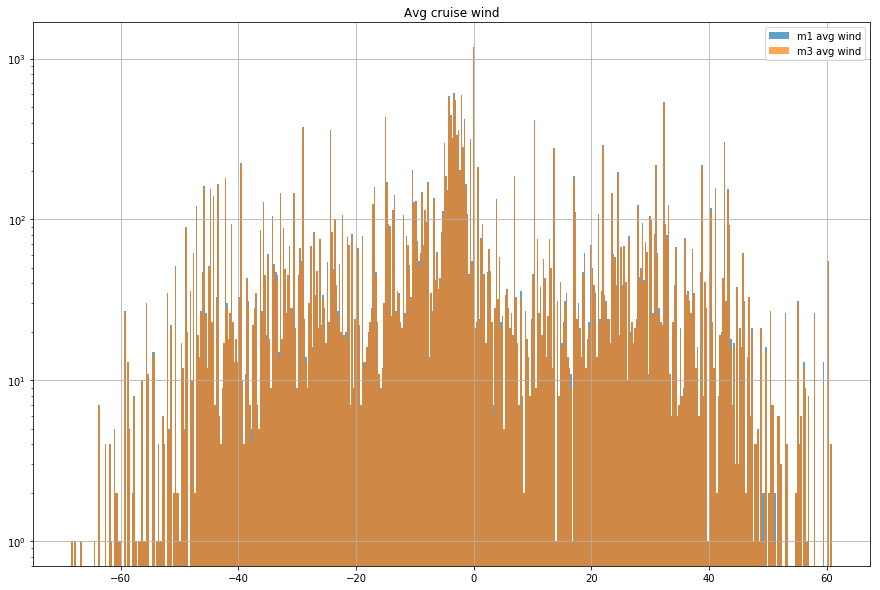

In [10]:
fig, ax = subplots(figsize=(15, 10))
df['m1_avg_cruise_wind_kt'].hist(bins=500, ax=ax, alpha=0.7, label='m1 avg wind')
df['m3_avg_cruise_wind_kt'].hist(bins=500, ax=ax, alpha=0.7, label='m3 avg wind')
ax.legend()
ax.set_title('Avg cruise wind')
ax.set_yscale('log')



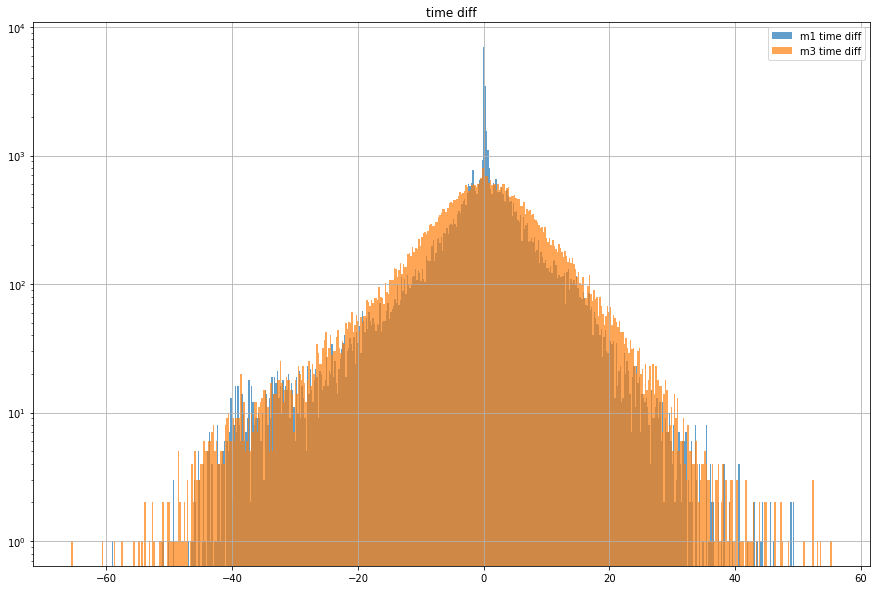

In [15]:
fig, ax = subplots(figsize=(15, 10))
dfcomp['m1_time_diff'].hist(bins=500, ax=ax, alpha=0.7, label='m1 time diff')
dfcomp['m3_time_diff'].hist(bins=500, ax=ax, alpha=0.7, label='m3 time diff')
ax.legend()
ax.set_title('time diff')
ax.set_yscale('log')

Text(0.5, 1.0, 'time diff')

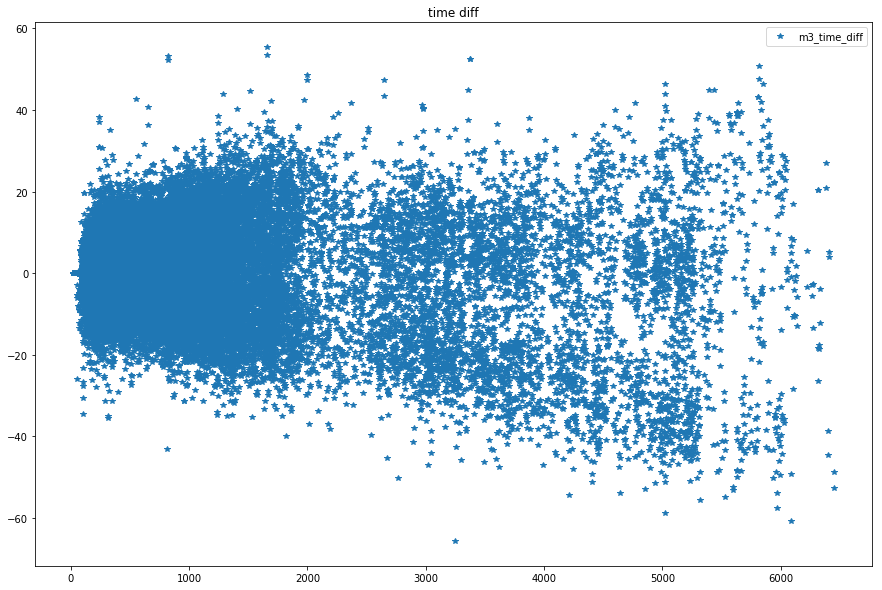

In [18]:
fig, ax = subplots(figsize=(15, 10))
ax.plot(dfcomp['f_m3_dist'],dfcomp['m3_time_diff'],'*')
ax.legend()
ax.set_title('time diff')

